### ARIMA and Seasonal ARIMA

#### Autoregressive Integrated Moving Averages

The genereal process for the ARIMA models is the following:
    
- Visualize the time series data
- Make the series data stationary (if its not stationary we will try to make it)
- Plot the Correlation and AutoCorrelation Charts (helps to tell the lapse value)
- Construct ARIMA Mode or SEassonal ARIMA based n the data
- Use the model to make predictions (we will be able to predict the data for next 2years)

Let's go through these steps!

In [21]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
data = pd.read_csv('perrin-freres-monthly-champagne-.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 2 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Month                                                   106 non-null    object 
 1   Perrin Freres monthly champagne sales millions ?64-?72  105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.8+ KB


In [68]:
data.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [69]:
data.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [70]:
# cleaning up the data
data.columns=["Month","Sales"]
data.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [71]:
data.iloc[105:107]

,Month,Sales
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [72]:
for i in range(0,len(data)):
    
    if i >= 105:
        data.drop(i,axis=0,inplace=True)
        
   # else:
         #break

In [73]:
data.shape

(105, 2)

In [74]:
data.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [75]:
len(data)

105

while working with Time Series, especially ARIMA/Seasonal ARIMA the format has to be in datetime

In [76]:
# convert month into datetime

data['Month']=pd.to_datetime(data['Month'])

In [84]:
data.sample()

,Sales
Month,
1964-02-01,2672.0


In [79]:
data.set_index('Month', inplace=True)

## Step: 1
    
visualize the time series: check for 
trend, seasonality or random patterns

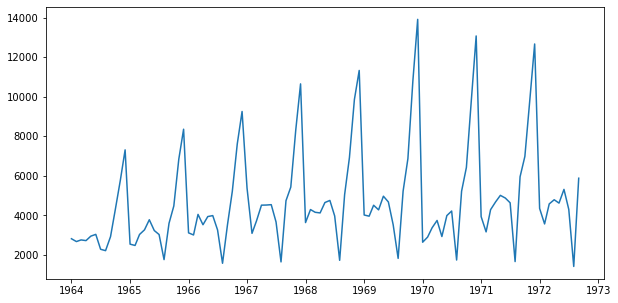

In [91]:
plt.figure(figsize=(10,5))
plt.plot(data)

- check if the data is stationary if not make it 
- the data looks seasonal, e.g.,the sales is higher in summer than winter

In [92]:
# Testing for stationarity

from statsmodels.tsa.stattools import adfuller

In [93]:
test_result = adfuller(data['Sales']) # gives 5 different values

In [94]:
#Ho: it is non-stationary (null hypothesis)
#H1: it is stationary

def adfuller_test(timeseries):
    
    result = adfuller(timeseries)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations used']
    

    for value, label in zip(result,labels):
            print(label+':'+str(value))
            
    if result[1] <= 0.05:
        print('strong evidence against null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary')
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [95]:
adfuller_test(data['Sales']) 

ADF Test Statistic:-1.8335930563276248
p-value:0.363915771660244
#Lags Used:11
Number of Observations used:93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


in here we accept the null hypothesis, since the p-value > 0.05 and its is non-stationary

## Step: 2

stationarise the series: using 
decomposition/differencing techniques

## Differencing

In [109]:
data['Sales First Difference'] = data['Sales'] - data['Sales'].shift(1)

In [110]:
data['Seasonal First Difference'] = data['Sales'] - data['Sales'].shift(12)

In [113]:
data.head(14)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [114]:
# reapply using duckey-fuller test again
adfuller_test(data['Seasonal First Difference'].dropna())

ADF Test Statistic:-7.626619157213163
p-value:2.060579696813685e-11
#Lags Used:0
Number of Observations used:92
strong evidence against null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='Month'>

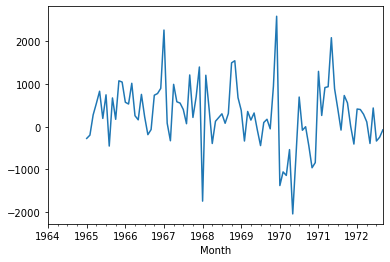

In [116]:
data['Seasonal First Difference'].plot()

## Step: 3
plot ACF/PACF(auto correlation 
function & partial) find (p,d,q) parameters

#### Stationarity 
A common assumption in many time series techniques is that the data are stationary. A stationary process has the property that the mean, variance and autocorrelation structure do not change over time.

## Auto Regressive Model

#### Final Thoughts on Autocorrelation and Partial Autocorrelation

- Identification of an AR model is often best done with the PACF.
- For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.

- Identification of an MA model is often best done with the ACF rather than the PACF.

- For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.

p,d,q p AR model lags d differencing q MA lags

In [121]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

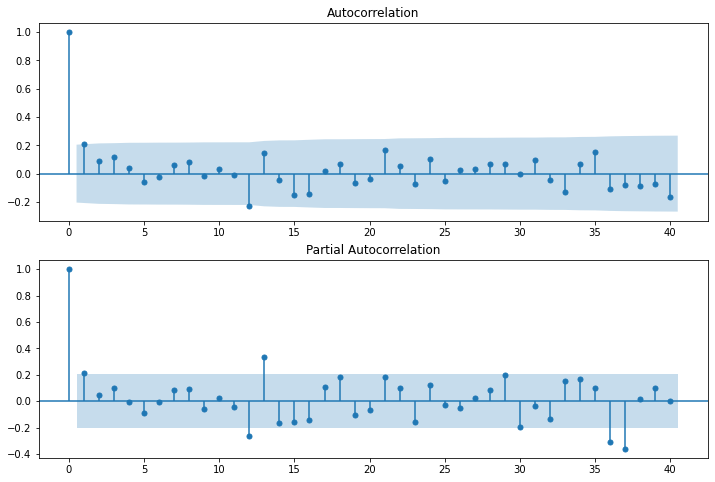

In [126]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211) # opsition of the sublot
fig = plot_acf(data['Seasonal First Difference'].iloc[13:], lags=40, ax=ax1) # 1st 12 values are NaN
ax2 = fig.add_subplot(212)
fig = plot_pacf(data['Seasonal First Difference'].iloc[13:], lags=40, ax=ax2)

- AR = p = 1 (in here PACF shuts off at 1)
- MA = q = 1 (tapers toward 0)
-      d = 1 (seasonal differencing was worked out at 1time) 

## Step: 4
Build an SARIMA model

since the data has seasonality we skip ARIMA model and proceed with Seasonal ARIMA

In [ ]:
#ARIMA
#should be used only when data is not seasonal, it is just an example in here

#model = ARIMA(data['Sales'], order=(1,1,1))
#model_fit = model.fit()no
#model_fit.summary()

## Seasonal ARIMA

In [137]:
import statsmodels.api as sm

In [138]:
model=sm.tsa.statespace.SARIMAX(data['Sales'], order=(1,1,1), seasonal_order=(1,1,1,12))
results = model.fit()

C:\Users\jaiha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<AxesSubplot:xlabel='Month'>

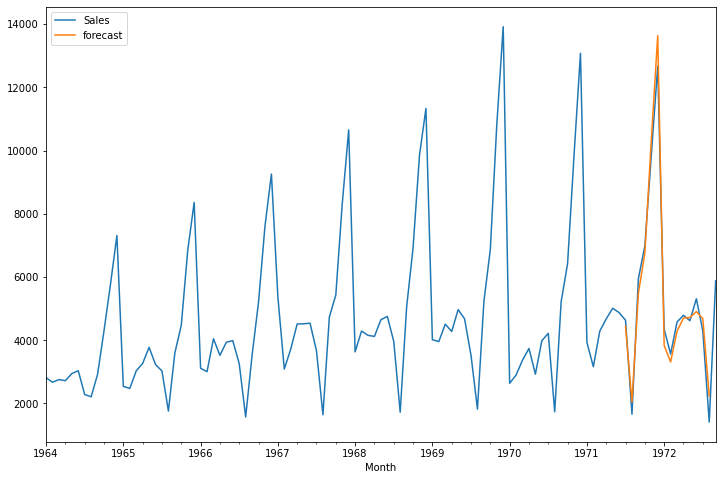

In [140]:
data['forecast'] = results.predict(start=90,end=103,dynamic=True)
data[['Sales','forecast']].plot(figsize=(12,8))

the prediction line green looks good with the actual one 

## Step: 5
make predictions using final 
ARIMA model

### Future Prediction

In [143]:
from pandas.tseries.offsets import DateOffset
future_dates=[data.index[-1]+DateOffset(months=x)for x in range(0,24)]

In [145]:
future_date_data = pd.DataFrame(index=future_dates[1:],columns=data.columns)

In [146]:
future_date_data.tail()

,Sales,Sales First Difference,Seasonal First Difference,forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [150]:
future_data = pd.concat([data,future_date_data])

<AxesSubplot:>

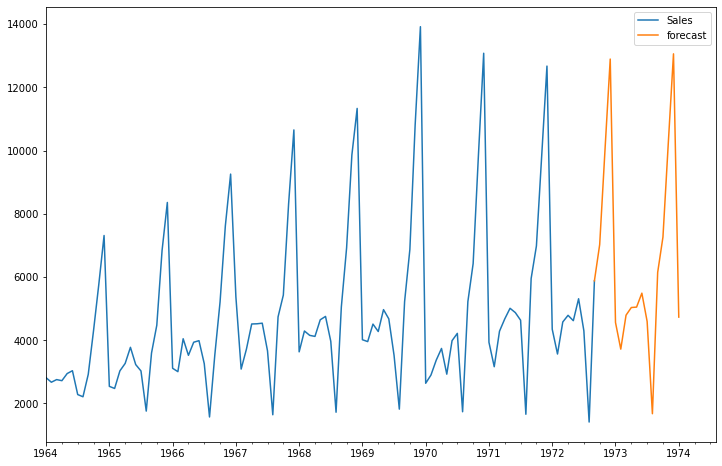

In [152]:
future_data['forecast'] = results.predict(start=104,end=120,dynamic=True)
future_data[['Sales','forecast']].plot(figsize=(12,8))